<a href="https://colab.research.google.com/github/dre-zouhair/CV_DOSI/blob/main/CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pycaret

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
sns.set_theme(style="darkgrid")
from pycaret.classification import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_raw = pd.read_csv("/content/drive/MyDrive/cardio_train.csv", sep=";")

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
#lal
print([columns for column in data_raw.columns if data_raw[column].isnull().sum()>0])

[]


In [7]:
data_raw.shape

(70000, 13)

In [8]:
data_raw.gender = data_raw.gender % 2

In [9]:
data_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,0,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,0,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
data_raw.drop(columns=['id'], inplace=True)

In [11]:
data_raw.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,0,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,0,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
data_raw.drop_duplicates(keep = 'first', inplace = True)

In [13]:
data_raw.shape

(69976, 12)

In [14]:
print('min age : {}, max age : {}'.format(data_raw.age.min()/365.25,data_raw.age.max()/365.25))

min age : 29.56331279945243, max age : 64.92265571526352


In [15]:
data_raw[data_raw.height <= 0 ] == True

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [16]:
data_raw[data_raw.weight <= 0 ] == True

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [17]:
data_raw["bmi"] = data_raw.weight / ((data_raw.height/100) ** 2 )

In [18]:
data_raw.shape

(69976, 13)

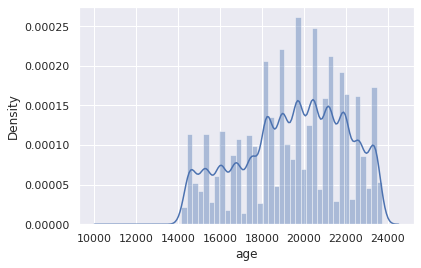

In [19]:
sns.distplot(data_raw.age)

In [20]:
data_raw["age_years"] = (data_raw.age / 365).apply(lambda x: int(x))
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69976 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69976 non-null  int64  
 1   gender       69976 non-null  int64  
 2   height       69976 non-null  int64  
 3   weight       69976 non-null  float64
 4   ap_hi        69976 non-null  int64  
 5   ap_lo        69976 non-null  int64  
 6   cholesterol  69976 non-null  int64  
 7   gluc         69976 non-null  int64  
 8   smoke        69976 non-null  int64  
 9   alco         69976 non-null  int64  
 10  active       69976 non-null  int64  
 11  cardio       69976 non-null  int64  
 12  bmi          69976 non-null  float64
 13  age_years    69976 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 8.0 MB


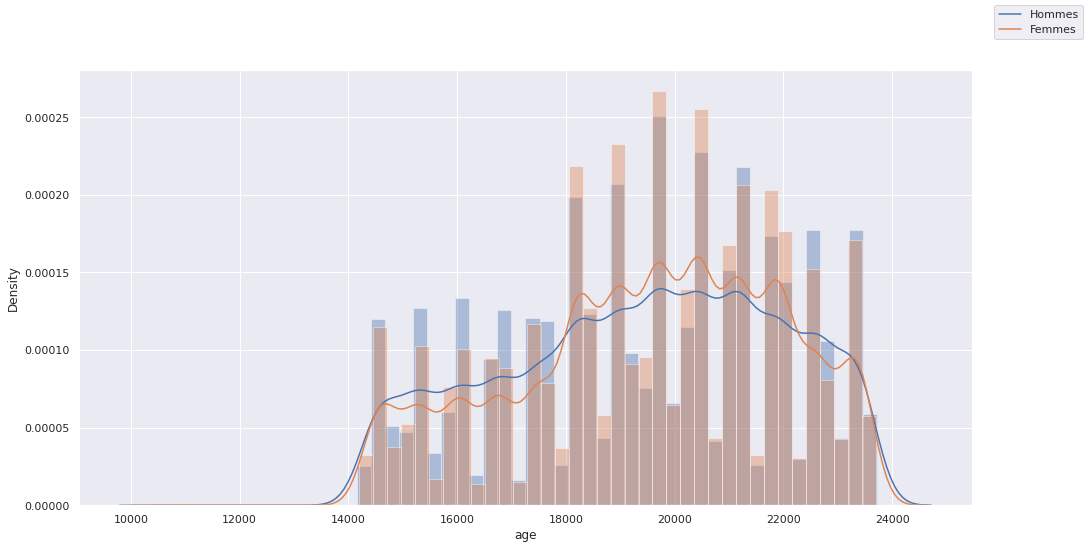

In [21]:
fig = plt.figure(figsize=(16,8))
sns.distplot(pd.Series(data_raw.age[data_raw.gender == 0]))
sns.distplot(pd.Series(data_raw.age[data_raw.gender == 1]))
fig.legend(labels=['Hommes','Femmes'])
plt.show()

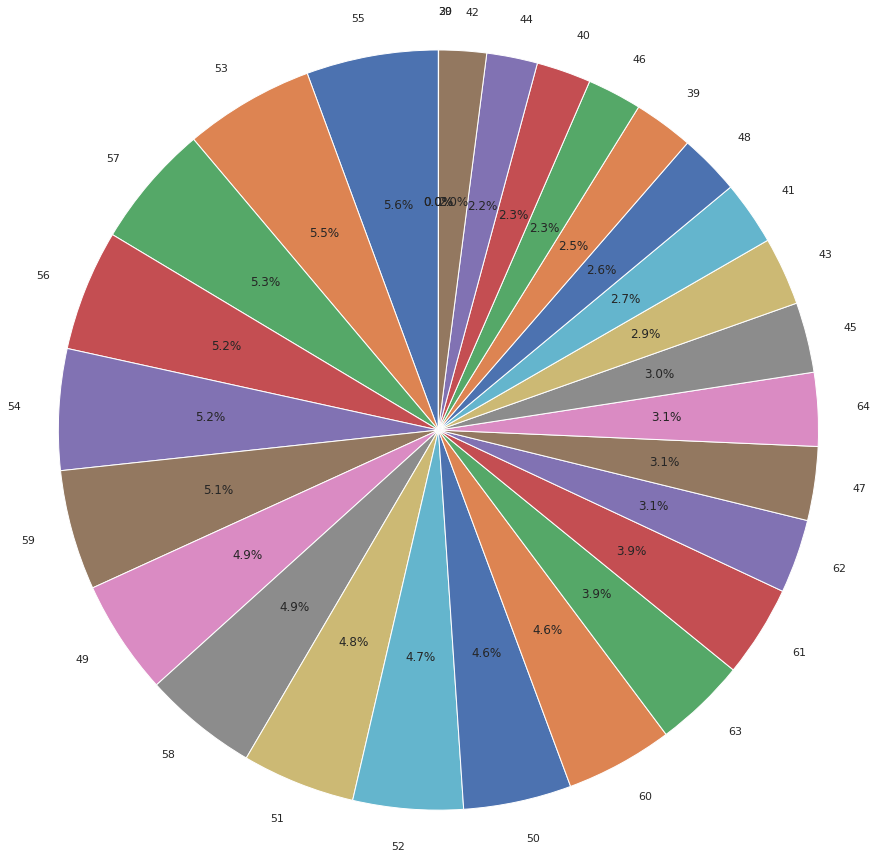

In [22]:
pie_data  =  data_raw.age_years.value_counts().tolist()
pie_labels  = data_raw.age_years.value_counts().index.tolist()
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(pie_data, labels=pie_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal') 

plt.show()

**What are Outlier ?**</br>
An Outlier is a data point that differs significantly from other observations.
This is formatted as code

An outlier may be due to variability in the measurement or it may indicate experimental error.

An outlier can cause serious problems in statistical analyses and prediction.

Detecting Outliers</br>
Detecting outlier and handling them can increase our accuracy score.

In [23]:
def standartization(x,s_list):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std
def outilier_draw(data_raw):
  x = data_raw.copy(deep=True)
  s_list = ["age", "height", "weight", "ap_hi", "ap_lo","bmi"]
  x_std=standartization(x,s_list)
  x_melted = pd.melt(frame=x_std, id_vars="cardio", value_vars=s_list, var_name="features", value_name="value", col_level=None)
  return x_melted

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

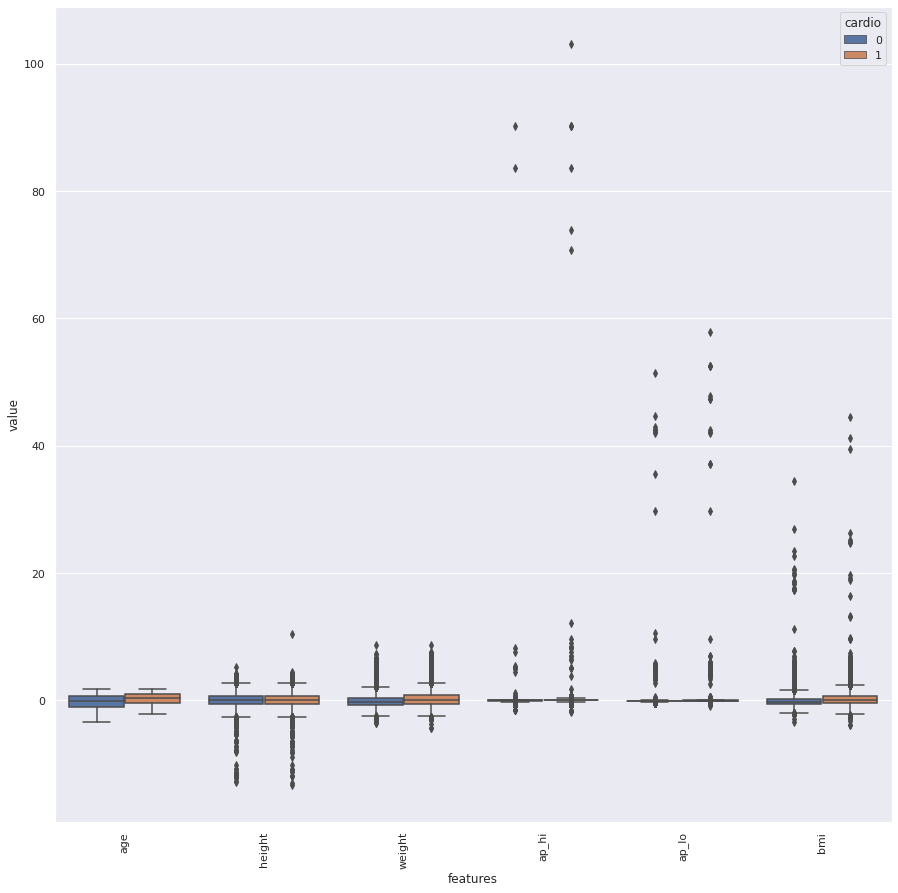

In [24]:
plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue="cardio", data=outilier_draw(data_raw))
plt.xticks(rotation=90)

* There are some outliers in the dataset, but as seen above there is an unusual outlier in ap_hi and ap_lo features.
* Let us calculate the low bound and hi bound of ap_lo and ap_hi features

In [25]:
ap_list = ["ap_hi", "ap_lo","bmi"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) # We created an empty dataframe
x = data_raw.copy(deep=True)
for each in ap_list:
    Q1 = x[each].quantile(0.25)
    Q3 = x[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
boundary

,ap_hi,ap_lo,bmi
lower_bound,90.0,65.0,14.354454
upper_bound,170.0,105.0,39.742883


* We can select the index of outlier data by using boundaries we calculated.
* Normally we should analyze both upper outliers and below outliers but in this case, I consider to handle just uppers because of their extremely higher values.

In [26]:
ap_hi_filter = (x["ap_hi"] > boundary["ap_hi"][1])
ap_lo_filter = (x["ap_lo"] > boundary["ap_lo"][1])                                                           
bmi_filter = (x["bmi"] > boundary["bmi"][1])                                                           
outlier_filter = (ap_hi_filter | ap_lo_filter | bmi_filter)
x_outliers = x[outlier_filter]
# count values 
x_outliers["cardio"].value_counts()

1    3222
0     972
Name: cardio, dtype: int64

In [27]:
2397/(2397+799)

0.75

* Cardiovascular disease is present in 75 percent of the ap_hi and ap_lo and bmi outlier data,
* Because of ap_hi and ap_lo and bmi symbolizes high blood pressure, the high rate of disease is consistent with real life.
* For this reason, I decided to drop just medically impossible data from the dataset.
* And I have dropped some of data because we have sufficent data (70000) otherwise I would try to handle them by assigning new values.

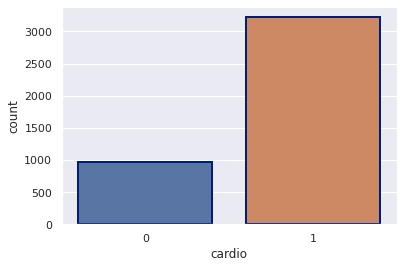

In [28]:
sns.countplot(x='cardio',data=x_outliers,linewidth=2,edgecolor=sns.color_palette("dark", 1))

In [29]:
#removing blod pressure
data_raw = data_raw[(0 < data_raw.ap_lo) & (data_raw.ap_lo < data_raw.ap_hi) & (data_raw.ap_lo< 200) & (data_raw.ap_hi < 250) & (data_raw.bmi < 100 )  & (data_raw.height > 57 ) ]

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

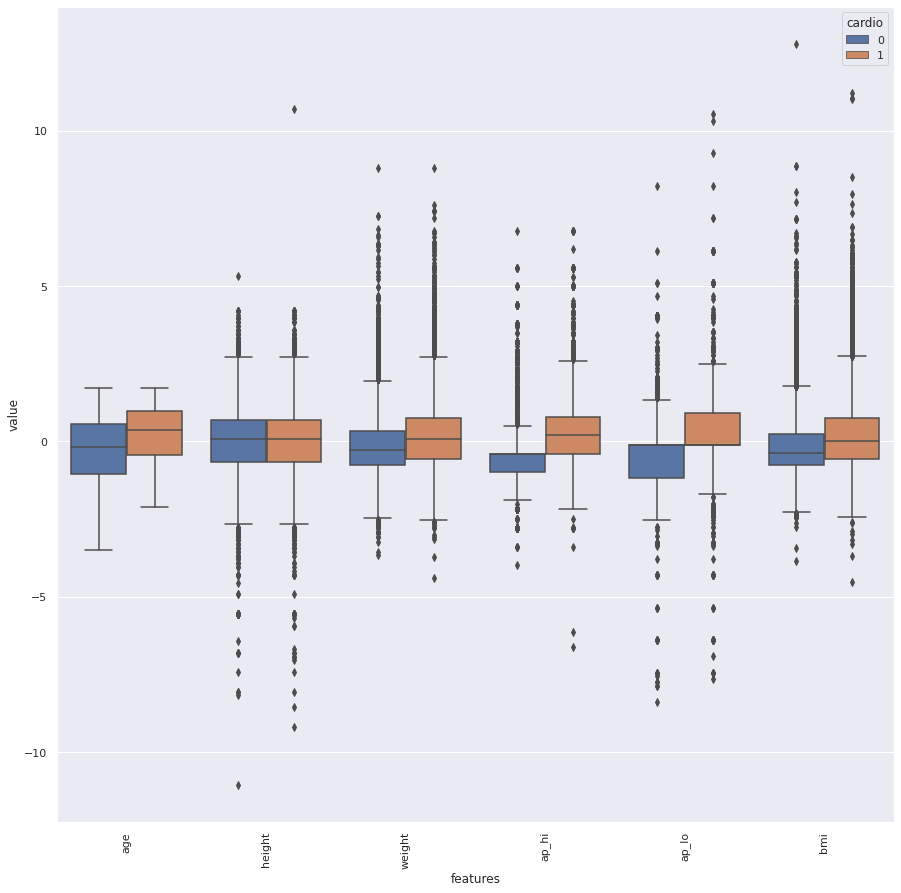

In [30]:
plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue="cardio", data=outilier_draw(data_raw))
plt.xticks(rotation=90)

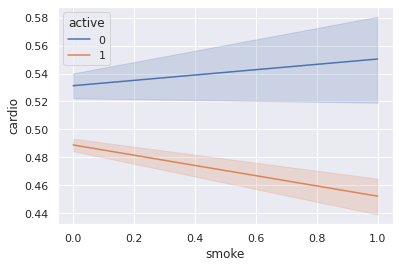

In [31]:
sns.lineplot(x="smoke", y="cardio",hue="active",data=data_raw)

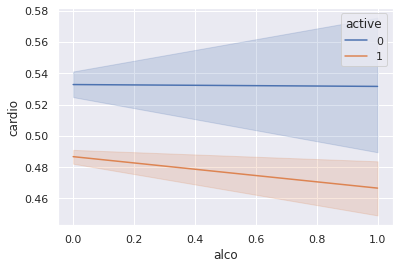

In [32]:
sns.lineplot(x="alco", y="cardio",hue="active",data=data_raw)

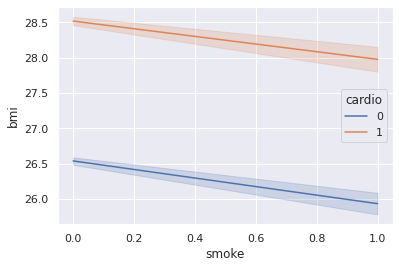

In [33]:
sns.lineplot(x="smoke", y="bmi",hue="cardio",data=data_raw)

**Preparing to modeling**


In [34]:
data_target = data_raw['cardio']
data = data_raw.drop(['cardio','age','height','weight'], axis=1)

In [35]:
train, test, target, target_test = train_test_split(data, data_target, test_size=0.1, random_state=0)

In [36]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

68.76

In [37]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

68.58

In [38]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)
coeff_df.set_index('Feature')

,Correlation
Feature,
ap_hi,-0.116505
ap_lo,0.040658
cholesterol,-0.008108
gluc,0.553671
smoke,-0.094523
alco,-1.412548
active,-0.671909
bmi,-0.902906
age_years,0.018517


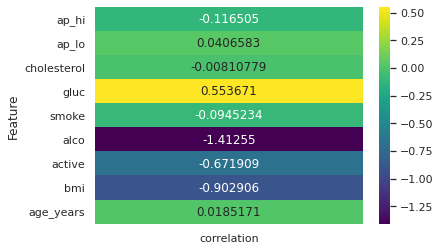

In [39]:
#f, ax = plt.subplots(figsize = (15,15))
#sns.heatmap(coeff_df, annot=True, fmt="g", cmap='viridis')
df = pd.DataFrame({"correlation": coeff_df.Correlation.tolist()},
                  index=coeff_df.Feature)

sns.heatmap(df, annot=True, fmt="g", cmap='viridis')

plt.show()

In [40]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

97.82

In [41]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

64.43

In [42]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

71.06

In [43]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

70.97

In [44]:
# k-Nearest Neighbors algorithm

knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(train, target)
acc_knn = round(knn.score(train, target) * 100, 2)
print(acc_knn, knn.best_params_)

81.93 {'n_neighbors': 3}


In [45]:
acc_test_knn = round(knn.score(test, target_test) * 100, 2)
acc_test_knn

67.73

In [46]:
data_c = data_raw.drop(['age','height','weight'], axis=1)

In [47]:
clf1 = setup(data_c, target = 'cardio')

,Description,Value
0,session_id,3705
1,Target,cardio
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(68657, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [48]:
#best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7338,0.7995,0.6912,0.7502,0.7194,0.4669,0.4684,0.478
gbc,Gradient Boosting Classifier,0.7335,0.7998,0.6900,0.7504,0.7188,0.4664,0.4679,3.251
catboost,CatBoost Classifier,0.7331,0.7986,0.6888,0.7504,0.7182,0.4656,0.4672,19.737
xgboost,Extreme Gradient Boosting,0.7301,0.7940,0.6865,0.7468,0.7153,0.4597,0.4612,12.746
ada,Ada Boost Classifier,0.7276,0.7930,0.6498,0.7635,0.7020,0.4541,0.4592,1.136
lr,Logistic Regression,0.7263,0.7905,0.6622,0.7538,0.7050,0.4517,0.4551,2.649
ridge,Ridge Classifier,0.7243,0.0000,0.6487,0.7583,0.6992,0.4476,0.4523,0.059
lda,Linear Discriminant Analysis,0.7243,0.7900,0.6487,0.7583,0.6992,0.4476,0.4523,0.147
knn,K Neighbors Classifier,0.6939,0.7425,0.6740,0.6964,0.6850,0.3874,0.3876,1.872
svm,SVM - Linear Kernel,0.6918,0.0000,0.6111,0.7414,0.6495,0.3823,0.4001,1.507


In [49]:
sample  = data_c.sample(frac=0.1, random_state=42) 

In [50]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3705, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [51]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7360,0.7980,0.7047,0.7465,0.7250,0.4715,0.4722
1,0.7395,0.8043,0.6761,0.7687,0.7194,0.4782,0.4816
2,0.7382,0.8068,0.7005,0.7525,0.7256,0.4760,0.4771
3,0.7233,0.7878,0.6761,0.7410,0.7070,0.4459,0.4475
4,0.7355,0.7982,0.6879,0.7550,0.7199,0.4704,0.4723
5,0.7357,0.8018,0.7012,0.7479,0.7238,0.4710,0.4719
6,0.7355,0.8024,0.6979,0.7493,0.7227,0.4705,0.4716
7,0.7322,0.8015,0.6890,0.7486,0.7176,0.4638,0.4653
8,0.7249,0.7930,0.6873,0.7377,0.7116,0.4493,0.4503
9,0.7367,0.8006,0.6915,0.7548,0.7218,0.4728,0.4745


In [52]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7360,0.7957,0.7030,0.7474,0.7245,0.4715,0.4723
1,0.7387,0.8045,0.6794,0.7652,0.7198,0.4765,0.4795
2,0.7439,0.8057,0.7018,0.7611,0.7302,0.4872,0.4886
3,0.7218,0.7883,0.6769,0.7382,0.7062,0.4430,0.4445
4,0.7357,0.7967,0.6874,0.7556,0.7199,0.4708,0.4727
5,0.7387,0.8021,0.7050,0.7506,0.7271,0.4768,0.4777
6,0.7362,0.8015,0.7029,0.7476,0.7246,0.4719,0.4727
7,0.7343,0.7999,0.6907,0.7511,0.7196,0.4680,0.4695
8,0.7235,0.7916,0.6873,0.7353,0.7105,0.4464,0.4473
9,0.7369,0.7990,0.6890,0.7566,0.7212,0.4732,0.4751


In [53]:
save_model(tuned_model, 'tuned_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='cardio',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.29,
                                 max_depth=-1, min_child_samples=85,
                                 min_child_weight=

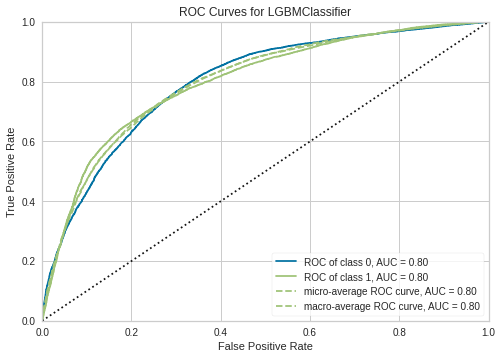

In [54]:
plot_model(tuned_model, plot = 'auc')

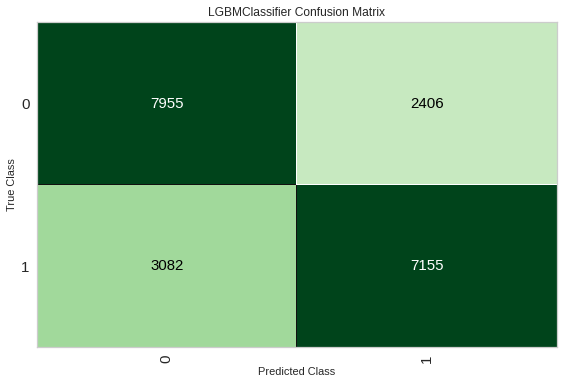

In [55]:
plot_model(tuned_model, 'confusion_matrix')

In [56]:
final_m = finalize_model(tuned_model)

In [57]:
save_model(final_m, 'final_m')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='cardio',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.29,
                                 max_depth=-1, min_child_samples=85,
                                 min_child_weight=

In [58]:
predict_model(final_m)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7435,0.8119,0.7019,0.7631,0.7312,0.4868,0.4883


,ap_hi,ap_lo,bmi,age_years,gender_0,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,alco_1,active_1,cardio,Label,Score
0,130.0,90.0,46.022354,50.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,1,0.5490
1,120.0,80.0,24.801588,63.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0.6575
2,120.0,90.0,45.488708,53.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,0.8184
3,120.0,80.0,23.030045,51.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,0,0.7523
4,140.0,90.0,32.987915,64.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0.8317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20593,120.0,80.0,24.772097,52.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0,0.7268
20594,100.0,70.0,24.242424,63.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0.6914
20595,120.0,80.0,26.927437,58.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0.5370
20596,120.0,80.0,23.051754,42.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8672


In [59]:
sample = sample.drop(columns=['cardio'])

In [60]:
sample.isnull().sum().sort_values(ascending = False)

age_years      0
bmi            0
active         0
alco           0
smoke          0
gluc           0
cholesterol    0
ap_lo          0
ap_hi          0
gender         0
dtype: int64

In [61]:
#Et je reset l'index.
sample.reset_index(drop=True, inplace=True)

In [62]:
Les_predictions = predict_model(final_m, data=sample)

In [63]:
Les_predictions

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,age_years,Label,Score
0,0,140,90,1,1,0,0,0,23.423557,48,1,0.8745
1,0,120,80,3,3,0,0,1,30.468750,55,1,0.7061
2,1,90,60,1,1,0,0,1,22.832879,52,0,0.8662
3,0,110,80,1,1,0,0,1,25.648918,44,0,0.8654
4,1,100,60,1,1,0,0,0,23.437500,41,0,0.9103
...,...,...,...,...,...,...,...,...,...,...,...,...
6861,1,145,82,1,1,0,0,0,35.430839,57,1,0.7412
6862,1,130,80,1,1,0,0,1,27.777778,57,1,0.5990
6863,0,110,70,1,3,0,0,1,24.243918,46,0,0.8112
6864,1,150,90,1,1,0,0,1,25.299376,59,1,0.8534


In [64]:
Les_predictions.Label.value_counts()

0    3774
1    3092
Name: Label, dtype: int64

In [68]:
Les_predictions[Les_predictions["Label"] == 1].head(5)

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,age_years,Label,Score
0,0,140,90,1,1,0,0,0,23.423557,48,1,0.8745
1,0,120,80,3,3,0,0,1,30.468750,55,1,0.7061
5,1,140,80,1,1,0,0,1,36.096071,57,1,0.7868
7,0,130,90,1,1,1,0,1,27.181630,61,1,0.5172
9,0,130,70,3,2,0,0,1,23.566632,58,1,0.7415
